In [24]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from collections.abc import Callable

In [25]:
def fitness_function_1(x1: float, x2: float) -> float:
    return np.sin(x1 * 0.05) + np.sin(x2 * 0.05) + 0.4 * np.sin(x1 * 0.15) * np.sin(x2 * 0.15)

In [26]:
def visualize_iteration(
    current_positions: npt.NDArray[np.float16],
    iteration_idx: int,
    x_min: float = 0,
    x_max: float = 100,
    fitness_function: Callable[[float, float], float] = fitness_function_1,
) -> None:
    x_linspace = np.linspace(x_min, x_max, 100)
    y_linspace = np.linspace(x_min, x_max, 100)
    x_mesh, y_mesh = np.meshgrid(x_linspace, y_linspace)
    z_mesh = fitness_function(x_mesh, y_mesh)

    plt.figure(figsize=(8, 6))

    contour = plt.contourf(x_mesh, y_mesh, z_mesh, cmap='viridis', levels=100)
    plt.colorbar(contour)

    plt.scatter(np.array(current_positions)[:, 0], np.array(current_positions)[:, 1], label='Świetliki', color="red")

    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.title(f"Algorytm Świetlików - Iteracja {iteration_idx + 1}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    plt.savefig(f"step_{iteration_idx + 1}.jpg")

In [27]:
def firefly_algorithm(
        N: int = 4,
        beta0: float = 0.3,
        gamma0: float = 0.1,
        mu0: float = 0.05,
        iteracje_liczba: int = 30,
        x_min: float = 0,
        x_max: float = 100,
        fitness_function: Callable[[float, float], float] = fitness_function_1,

) -> npt.NDArray[np.float16]:
    # 2. Wylicznie gamma, mui, gdzie i to identyfikator atrybutu wejściowego

    # maksymalna możliwa odległość między osobnikami
    r_max = (x_max - x_min) * np.sqrt(2)
    # gamma – określa jak bardzo przyciąganie spada wraz z odległością, ponieważ wyznaczenie dobrego gamma jest trudne, dlatego zaproponowano
    gamma = gamma0 / r_max
    mu = []
    for i in range(2):
        mu.append((x_max - x_min) * mu0)

    # 3.	Stworzenie tablicy dwuwymiarowej X określającej położenie początkowe osobników o rozmiarze N x n (n - liczba atrybutów, N – liczba osobników) o początkowych wartościach wylosowanych korzystając z zakresu zmienności każdego atrybutu (xmin,i , xmax,i)
    X = np.random.uniform(x_min, x_max, size=(N, 2))
    history = np.zeros((iteracje_liczba, N, 2), dtype=np.float16)
    # 4.	Wykonaj algorytm w pętli przez iteracje_liczba razy.
    for iteration in range(iteracje_liczba):
        history[iteration] = X.copy()
        # 4.1.	Oceń wszystkie osobniki (za pomocą funkcji F()), niech Fi to aktualna ocena osobnika xi .
        F = np.array([fitness_function(*ind) for ind in X])
        # 4.2.	Pętla po wszystkich osobnikach, a to identyfikator osobnika. Najlepiej, aby a było iterowane w losowej kolejności (na przykład 0; 2; 1; 3)
        idx_a = np.random.permutation(N)
        idx_b = np.random.permutation(N)
        for a in idx_a:
            # 4.2.1.	Pętla po wszystkich osobnikach, b to identyfikator osobnika. Najlepiej, aby b było iterowane w losowej kolejności.
            for b in idx_b:
                # 4.2.1.1.	Jeśli przystosowanie b-tego osobnika jest lepsze niż a-tego osobnika, czyli Fb > Fa
                if F[b] > F[a]:
                    # 4.2.1.1.1. Wyliczanie poziom przyciągania beta = beta0 * e^-gamma*odległość(x_a, x_b)^2.
                    distance = np.sqrt((X[a, 1] - X[b, 1])**2 + (X[a, 0] - X[b, 0])**2)
                    beta = beta0 * np.exp(-gamma * distance**2)
                    # 4.2.1.1.2.	Zastosuj przyciąganie Xa,i = Xa,i + beta * (Xb,i - Xa,i), dla każdego i.
                    X[a] += beta * (X[b] - X[a])
                    # 4.2.1.1.3.	Uaktualnij wartość Fa
                    F[a] = fitness_function(*X[a])
            # 4.2.2.	Dodaj mutację, czyli Xa,i += losowa z przedziału (-mui; +mui), dla każdego i.
            for i in range(2):
                X[a, i] += np.random.randint(-mu[i], +mu[i])

    return history

In [28]:
history = firefly_algorithm()

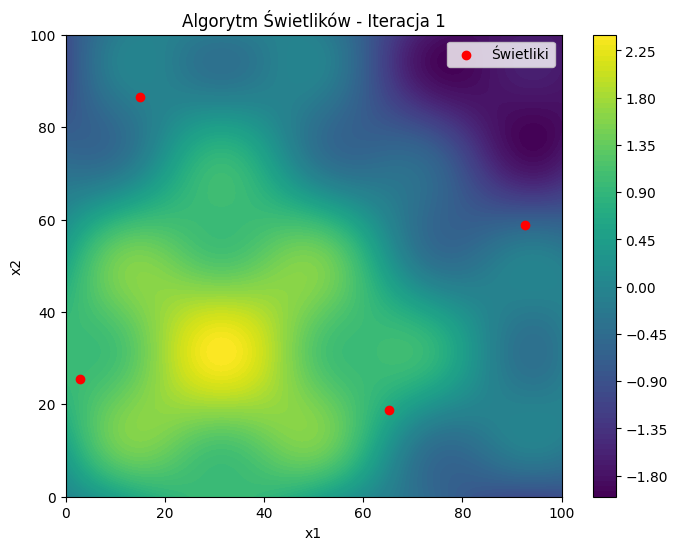

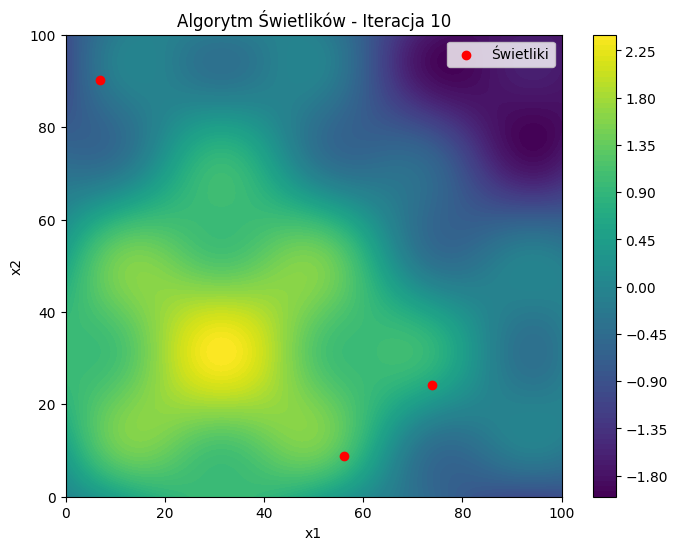

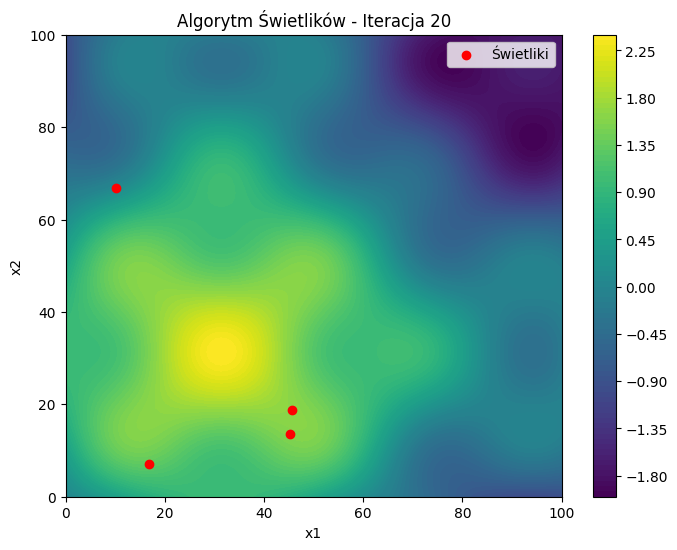

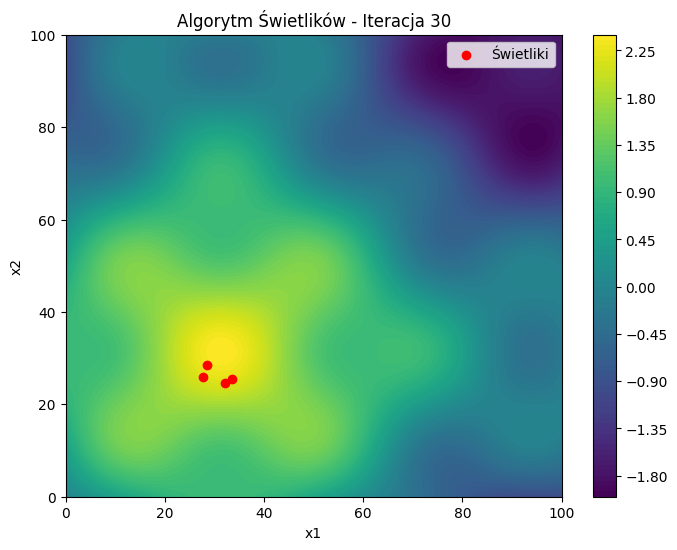

In [29]:
iterations_id = np.array([0, 9, 19, 29])
h = history[iterations_id]
for i, positions_in_step in zip(iterations_id, history[iterations_id]):
    visualize_iteration(
        current_positions=positions_in_step,
        iteration_idx=i,
    )